For this first deliverable, I need to develop this:
<br /> 1.- Apply scaling techniques
<br /> 2.- preprocess of data

In [ ]:
# Since maybe I'll use my home computer instead of the colab, I'll list the install comands:

# =================================
# PLEASE ONLY RUN ONCE, THEN COMMENT
# THIS SECTION AGAIN.
# =================================

# %pip install numpy
# %pip install pandas
# %pip install tensorflow --user
# %pip install matplotlib

  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached grpcio-1.71.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached h5py-3.13.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached markdown-3.8-py3-none-any.whl.metadata (5.1 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.w

  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)

   ------------- -------------------------- 1/3 [contourpy]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matplotlib]
   -------------------------- ------------- 2/3 [matp

In [6]:
# All the imports come here
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# It's important to comment the import depending on the OS
# Windows PC
# base_dir = r"/dataset/car parts"

# Mac OS
base_dir = "/Users/alanpagzz/Codes/carssification_AI/dataset/car parts"

# Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# base_dir = "/content/drive/MyDrive/Octavo Semestre/IA/car dataset/car parts"

In [ ]:
train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")

# I will omit the test directory for now. I don't want to mix the test data with the training data

In [ ]:
# Time to preprocess the data

# First, scale pixels from 0-255 to 0-1
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# I don't want to augment the validation data nor the test data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=10,
    class_mode="categorical",
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=10,
    class_mode="categorical",
)


# Let's get the dictionary
class_indices = train_generator.class_indices
print(class_indices)

Found 6917 images belonging to 40 classes.
Found 200 images belonging to 40 classes.
{'AIR COMPRESSOR': 0, 'ALTERNATOR': 1, 'BATTERY': 2, 'BRAKE CALIPER': 3, 'BRAKE PAD': 4, 'BRAKE ROTOR': 5, 'CAMSHAFT': 6, 'CARBERATOR': 7, 'COIL SPRING': 8, 'CRANKSHAFT': 9, 'CYLINDER HEAD': 10, 'DISTRIBUTOR': 11, 'ENGINE BLOCK': 12, 'FUEL INJECTOR': 13, 'FUSE BOX': 14, 'GAS CAP': 15, 'HEADLIGHTS': 16, 'IDLER ARM': 17, 'IGNITION COIL': 18, 'LEAF SPRING': 19, 'LOWER CONTROL ARM': 20, 'MUFFLER': 21, 'OIL FILTER': 22, 'OIL PAN': 23, 'OVERFLOW TANK': 24, 'OXYGEN SENSOR': 25, 'PISTON': 26, 'RADIATOR': 27, 'RADIATOR FAN': 28, 'RADIATOR HOSE': 29, 'RIM': 30, 'SPARK PLUG': 31, 'STARTER': 32, 'TAILLIGHTS': 33, 'THERMOSTAT': 34, 'TORQUE CONVERTER': 35, 'TRANSMISSION': 36, 'VACUUM BRAKE BOOSTER': 37, 'VALVE LIFTER': 38, 'WATER PUMP': 39}


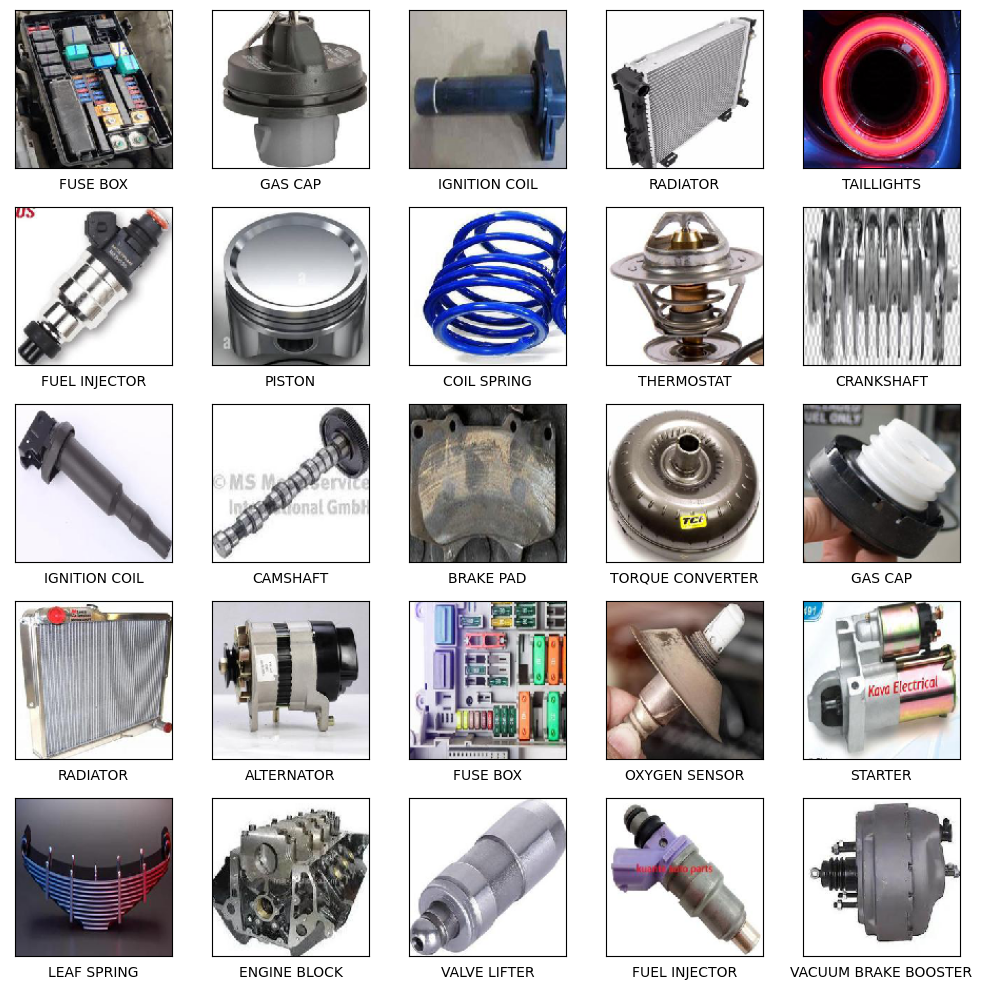

In [ ]:
# Just to check if the data is loading correctly
# Let's visualize some images from the training set

# get class from index, from the dictionary
index_to_class = {v: k for k, v in train_generator.class_indices.items()}

plt.figure(figsize=(10, 10))

# Let's show 25 images
for i in range(25):
    img, label = next(train_generator)  # get batch
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img[0])
    class_index = np.argmax(label[0])
    plt.xlabel(index_to_class[class_index])
plt.tight_layout()
plt.show()